<a href="https://colab.research.google.com/github/nidtalebrachid/Python-Projects/blob/main/ClusterProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

#Loading the Raw Data into Python

In [ ]:
# Loading the data
raw_data = pd.read_csv('https://raw.githubusercontent.com/Pitsillides91/Python-Tutorials/master/Unsupervised%20Learning/Events%20Raw%20Data.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(14783, 19)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [ ]:
raw_data.to_csv('Events_Cluster_Raw1.csv', sep='\t')

In [ ]:
os.getcwd()

'/content'

# 5. Data Preprocessing
5.1. Exploratory Data Analysis & Data Cleaning

In [ ]:
# Checking for null values

raw_data.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14783 entries, 0 to 14782
Data columns (total 19 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   CUSTOMER                                                        14783 non-null  int64  
 1   Age                                                             14783 non-null  object 
 2   Gender                                                          14783 non-null  object 
 3   Postcode                                                        14783 non-null  object 
 4   District                                                        14783 non-null  object 
 5   Constituency                                                    14783 non-null  object 
 6   latitude                                                        14783 non-null  float64
 7   longitude                                        

In [ ]:
raw_data.nunique()

CUSTOMER                                                          14778
Age                                                                  14
Gender                                                                2
Postcode                                                          14674
District                                                            225
Constituency                                                        358
latitude                                                          13242
longitude                                                         13262
Current_Status                                                        8
Total_Household_Income                                                8
How often you attend Entertaining events in a year?                   5
Social_Media                                                          5
How many hours are you willing to travel to attend an event?          7
Do you enjoy adrenaline-rush activities?                        

In [ ]:
raw_data['Total_Household_Income'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
14778    False
14779    False
14780    False
14781    False
14782    False
Name: Total_Household_Income, Length: 14783, dtype: bool

In [ ]:
# Visualize the NULL observations
raw_data[raw_data['Total_Household_Income'].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Total_Household_Income'])

# Printing the shape
print(raw_data.shape)

# Visualize the NULL observations
raw_data.isnull().sum()

(14778, 19)


CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

In [ ]:
raw_data.columns

features1=['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

In [ ]:
unique_vals = np.unique(raw_data['Did you find our events value for money?'])
unique_vals 


array(['Entirely agree', 'Entirely disagree', 'Mostly agree',
       'Mostly disagree', 'Neither agree nor disagree', 'Somewhat agree',
       'Somewhat disagree'], dtype=object)

In [ ]:
for i in features1 :
    unique_vals = np.unique(raw_data[i])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(i, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(i, nr_values))

The number of values for feature CUSTOMER :14778
The number of values for feature Age :9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Postcode :14674
The number of values for feature District :225
The number of values for feature Constituency :358
The number of values for feature latitude :13242
The number of values for feature longitude :13262
The number of values for feature Current_Status :8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature Total_Household_Income :8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature How often you attend Entertaining events in a year? :

In [ ]:
# Investigate all the elements whithin each Feature 

for column in raw_data :
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CUSTOMER :14778
The number of values for feature Age :9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Postcode :14674
The number of values for feature District :225
The number of values for feature Constituency :358
The number of values for feature latitude :13242
The number of values for feature longitude :13262
The number of values for feature Current_Status :8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature Total_Household_Income :8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature How often you attend Entertaining events in a year? :

In [ ]:
# Getting the columns we need

raw_data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

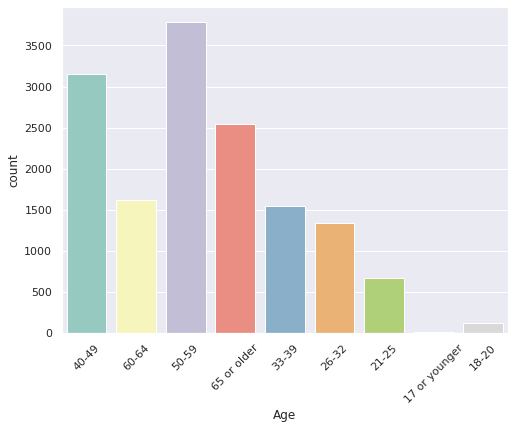

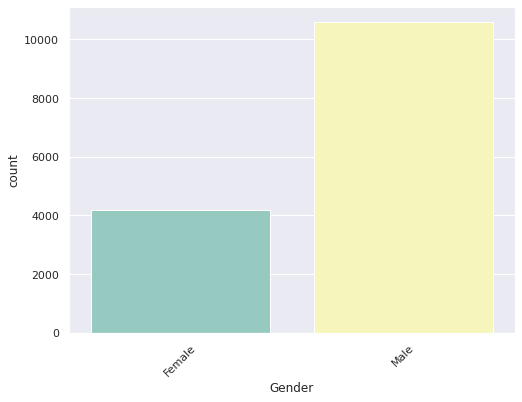

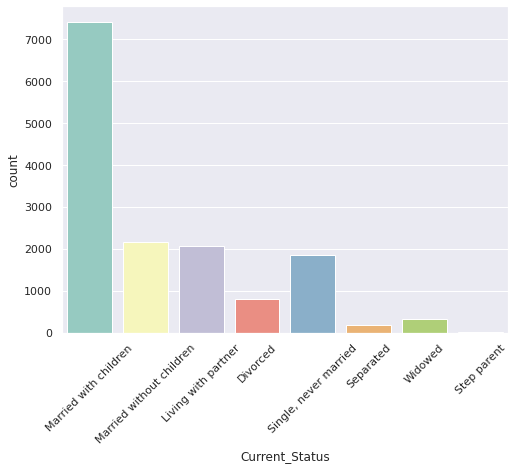

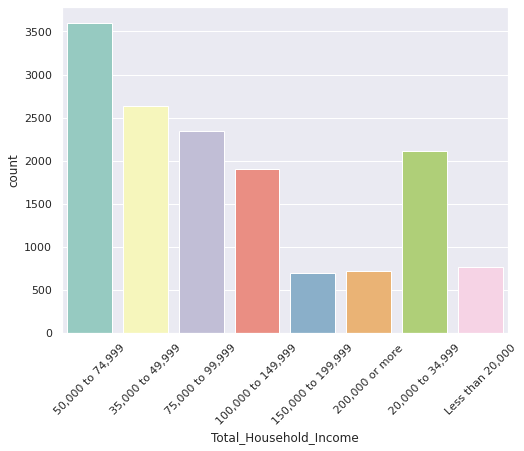

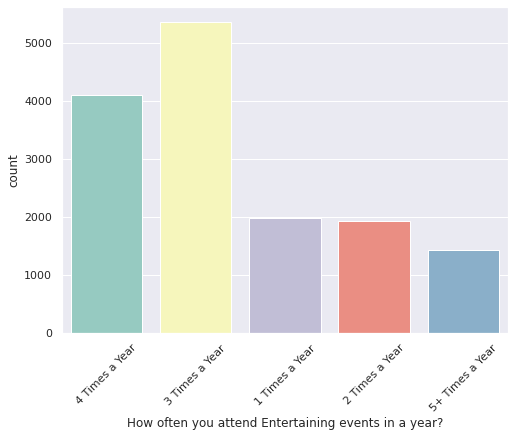

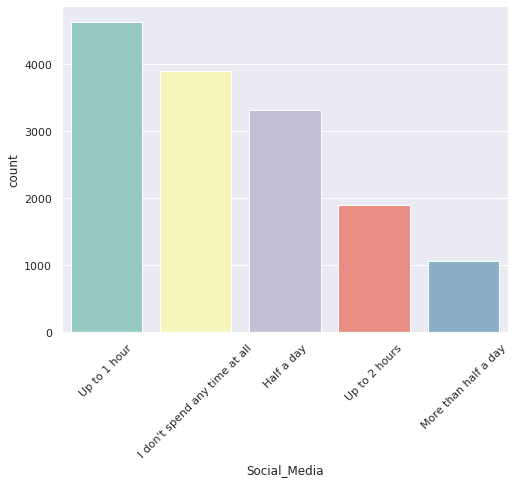

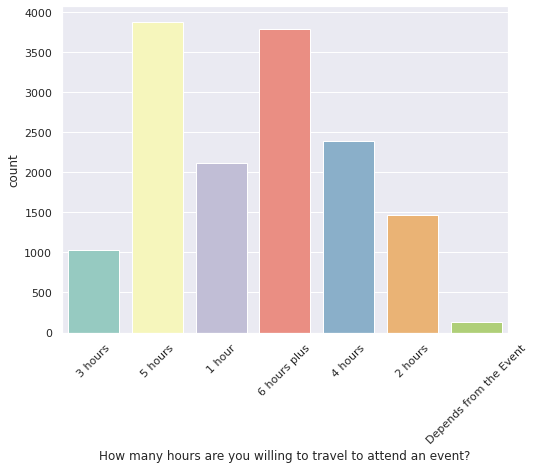

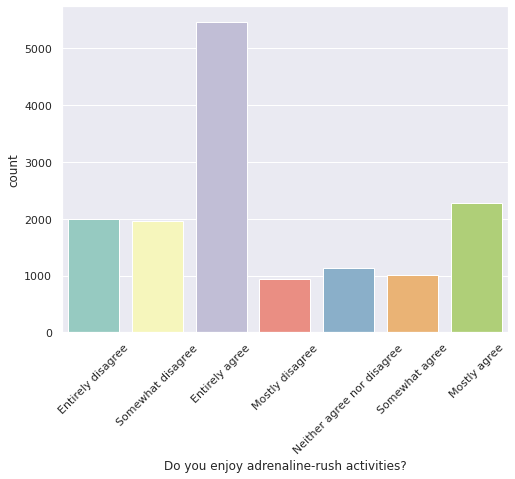

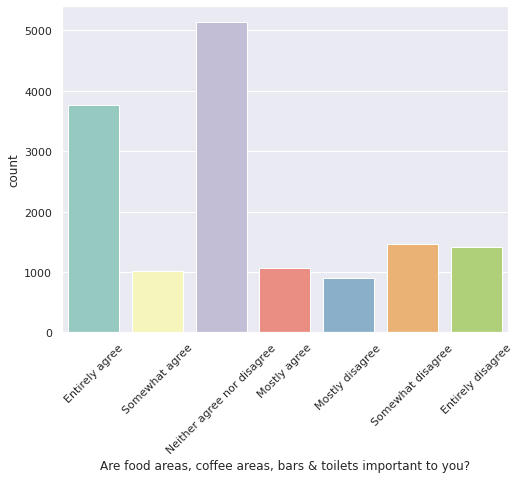

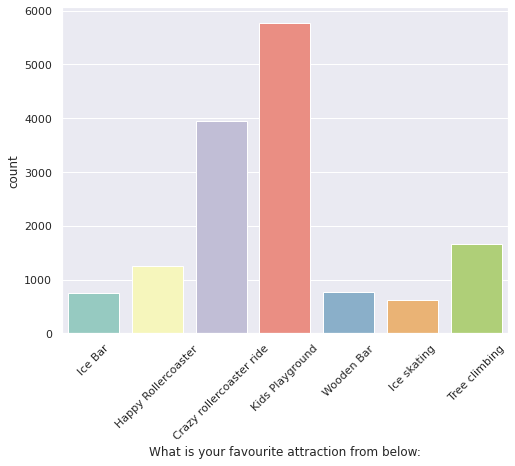

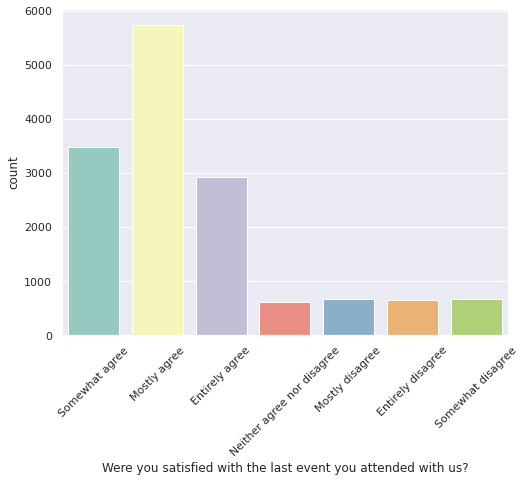

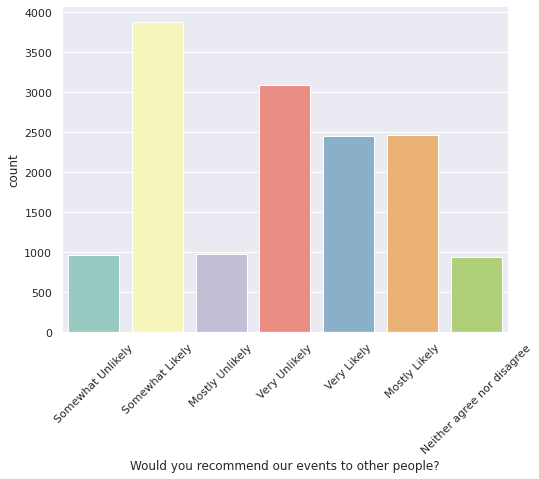

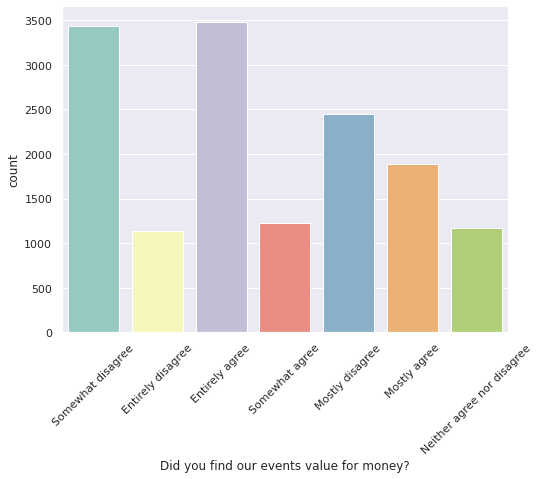

In [ ]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Age', 'Gender', 
       'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = raw_data,palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
raw_data.nunique()

CUSTOMER                                                          14778
Age                                                                   9
Gender                                                                2
Postcode                                                          14674
District                                                            225
Constituency                                                        358
latitude                                                          13242
longitude                                                         13262
Current_Status                                                        8
Total_Household_Income                                                8
How often you attend Entertaining events in a year?                   5
Social_Media                                                          5
How many hours are you willing to travel to attend an event?          7
Do you enjoy adrenaline-rush activities?                        

#5.3 Feature Engineering - Numeric Representation

In [ ]:
# Making categorical variables into numeric representation

print(raw_data.shape)

# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
raw_data1 = raw_data[features]
print(raw_data1.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data1, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()

(14778, 19)
(14778, 13)
(14778, 86)


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
raw_data.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [ ]:
# Running Kmeans

X_train = new_raw_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [0 4 4 ... 0 1 4]
The Inertia is:  101900.26594116399


In [ ]:
kmeans.labels_.shape

(14778,)

#What is Inertia:
Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.

In [ ]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 125619.0297206569
The innertia for : 3 Clusters is: 114905.38684266653
The innertia for : 4 Clusters is: 106337.17594801712
The innertia for : 5 Clusters is: 100865.16529237588
The innertia for : 6 Clusters is: 96432.53526396464
The innertia for : 7 Clusters is: 93814.49897631687
The innertia for : 8 Clusters is: 91696.5751387628
The innertia for : 9 Clusters is: 89725.00222083413
The innertia for : 10 Clusters is: 88493.22915979187
The innertia for : 11 Clusters is: 87581.06059954673
The innertia for : 12 Clusters is: 86617.66608880102
The innertia for : 13 Clusters is: 85829.38420440155
The innertia for : 14 Clusters is: 85014.85271668143
The innertia for : 15 Clusters is: 84434.74381493355
The innertia for : 16 Clusters is: 83662.83564950578
The innertia for : 17 Clusters is: 82854.33711923592
The innertia for : 18 Clusters is: 82485.74994726591
The innertia for : 19 Clusters is: 82187.9337203962


Text(0.5, 1.0, 'Inertia Plot per k')

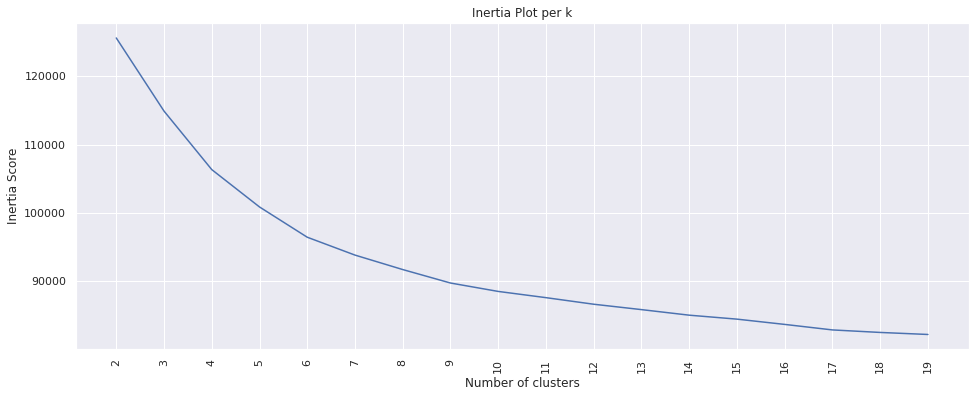

In [ ]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [ ]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2208,1226,8492,1865,987


In [ ]:
kmeans.labels_

array([2, 2, 2, ..., 2, 0, 2], dtype=int32)

In [ ]:
predictions

array([2, 2, 2, ..., 2, 0, 2], dtype=int32)

In [ ]:
new_raw_data.shape

(14778, 86)

#7.0 Running Principal Component Analysis (PCA) to Visualize & improve results
- What is it?
PCA is a dimensionality reduction technique that transforms a number of possibly correlated variables into a smaller number of uncorrelated variables; called principal components
The goal of PCA is to extract the most important information from the data table by compressing the size of the data set and keeping only the important information; then PCA computes new variables called principal components.
#- Additional Info:
The first principal component is required to have the largest possible variance (inertia) and therefore this component will explain the largest part of the inertia / variance of the data table; hence the less principal components you have the lower the inertia will be after PCA.
For every new component you add, the inertia will increase since the rotations are always performed in a subspace and the new axes will always explain less inertia than the original components; which are computed to be optimal
Therefore, inertia should not be the criterium to choose the optimal number of principal component since the lower the components are the lower the inertia will be.
95% explained variance should be the criterium when choosing the number of principal components

Explained variance ratio (first two components): [0.167356 0.078177]


<Figure size 576x432 with 0 Axes>

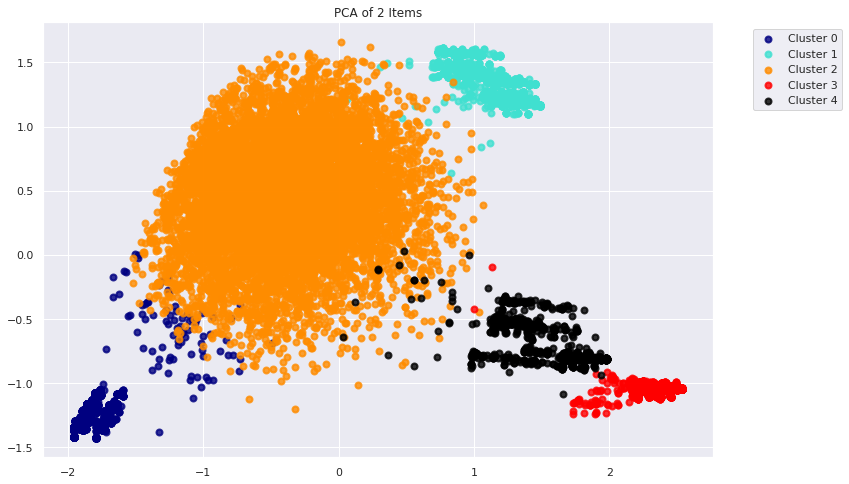

In [ ]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

#7.1. Identifying the "best" number of components

Total Variance in our dataset is:  9.789277508428576
The 95% variance we want to have is:  9.299813633007147

Variance explain with 30 n_compononets:  7.800063287617345
Variance explain with 35 n_compononets:  8.200059944222122
Variance explain with 40 n_compononets:  8.559358189926288
Variance explain with 41 n_compononets:  8.625206072416153
Variance explain with 50 n_compononets:  9.157222065601198
Variance explain with 53 n_compononets:  9.3018019975868
Variance explain with 55 n_compononets:  9.391528190593439
Variance explain with 60 n_compononets:  9.592274980903571


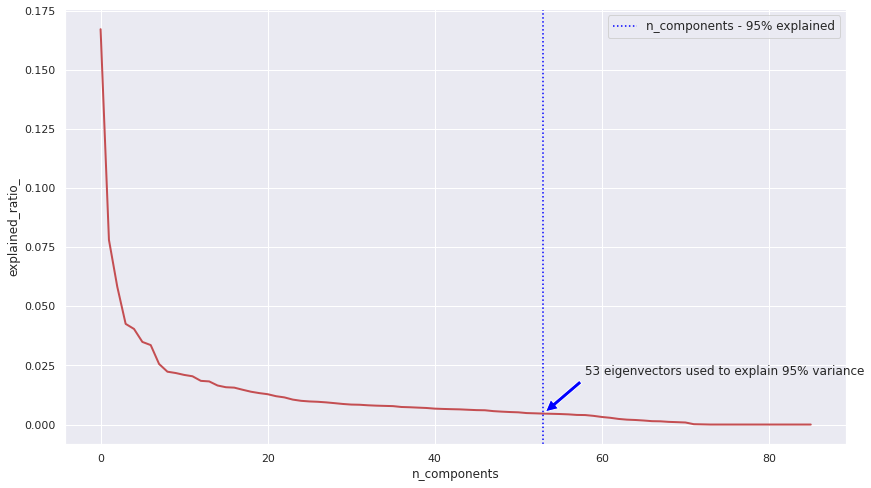

In [ ]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(53,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('53 eigenvectors used to explain 95% variance', xy=(53, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 118418.0053343994
The innertia for : 3 Clusters is: 107706.7380479888
The innertia for : 4 Clusters is: 99150.89658689548
The innertia for : 5 Clusters is: 94717.71454592912
The innertia for : 6 Clusters is: 89259.98846975263
The innertia for : 7 Clusters is: 87032.31815907666
The innertia for : 8 Clusters is: 84734.25265175468
The innertia for : 9 Clusters is: 82901.43389426019
The innertia for : 10 Clusters is: 81675.79302907886
The innertia for : 11 Clusters is: 80363.07116110683
The innertia for : 12 Clusters is: 79645.57849749745
The innertia for : 13 Clusters is: 78836.55417592308
The innertia for : 14 Clusters is: 77765.06416907388
The innertia for : 15 Clusters is: 77471.39025517202
The innertia for : 16 Clusters is: 76646.93730762883
The innertia for : 17 Clusters is: 75782.7240216461
The innertia for : 18 Clusters is: 75256.95483848415
The innertia for : 19 Clusters is: 74707.75842734522


Text(0.5, 1.0, 'Inertia Plot per k')

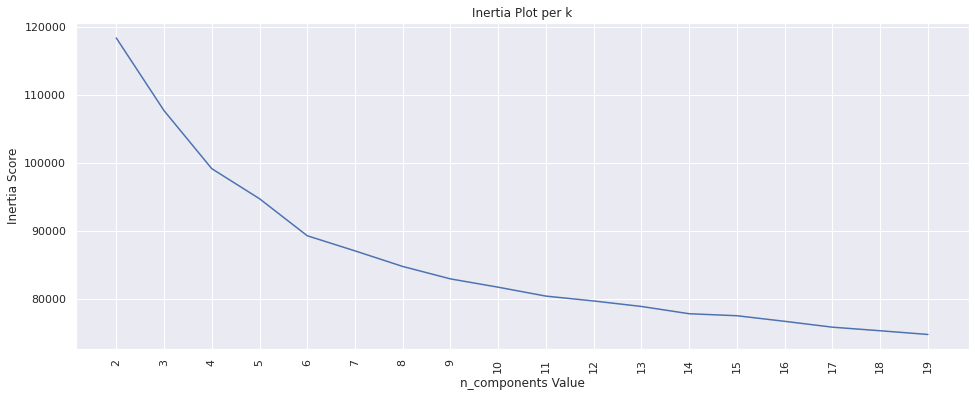

In [ ]:
# Running PCA again

pca = PCA(n_components=53, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

# 8.0. Another way of "Improving" results Could* be to Clean/Combine Variables

In [ ]:
# Visualizing all of your variables / columns
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

In [ ]:
################################################################################################
########################## CLEAN/COMBINE VARIABLES TO IMPROVE RESULTS ##########################
################################################################################################

print("The shape is: ", new_raw_data.shape)

# Cleaning the "how_often_you_attend_entertaining_events_in_a_year" column

# 1-2 times
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'] = 0
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(new_raw_data['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) | (new_raw_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1

# 4-5 times
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'] = 0
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'][(new_raw_data['How often you attend Entertaining events in a year?_4 Times a Year'] == 1) | (new_raw_data['How often you attend Entertaining events in a year?_5+ Times a Year'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "social_media" column
# half a day + more than half a day
new_raw_data['social_media_Half a day plus'] = 0
new_raw_data['social_media_Half a day plus'][(new_raw_data['Social_Media_Half a day'] == 1) | (new_raw_data['Social_Media_More than half a day'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour" column

# 1 to 2 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'][(new_raw_data['How many hours are you willing to travel to attend an event?_1 hour'] == 1) | (new_raw_data['How many hours are you willing to travel to attend an event?_2 hours'] == 1)] = 1

# 3 to 4 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'][(new_raw_data['How many hours are you willing to travel to attend an event?_3 hours'] == 1) | (new_raw_data['How many hours are you willing to travel to attend an event?_4 hours'] == 1)] = 1

# 5 to 6 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'][(new_raw_data['How many hours are you willing to travel to attend an event?_6 hours plus'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "do_you_enjoy_adrenaline_rush_activities" column

# Mostly & Somewhat Agree
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'][(new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1) | (new_raw_data['Do you enjoy adrenaline-rush activities?_Mostly agree'] == 1)] = 1

# Mostly & Somewhat Disagree
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'][(new_raw_data['Were you satisfied with the last event you attended with us?_Mostly disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


The shape is:  (14778, 86)
The shape is:  (14778, 88)
The shape is:  (14778, 89)
The shape is:  (14778, 92)
The shape is:  (14778, 94)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/li

In [ ]:
# Cleaning the "are_food_areas_coffee_areas_bars_toilets_important_to_you" column

# Mostly & Somewhat Agree
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'][(new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree'] == 1)] = 1


# Mostly & Somewhat & entirely Disagree
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'][(new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree'] == 1) | (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree'] == 1) | (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)



# Cleaning the "were_you_satisfied_with_the_last_event_you_attended_with_us" column

# Entirely & Mostly & Somewhat & Neither Disagree
new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'] = 0
new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'][(new_raw_data['Were you satisfied with the last event you attended with us?_Somewhat disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Mostly disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Entirely disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "would_you_recommend_our_events_to_other_people" column

# Mostly & Somewhat & Neither Unlikely
new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'] = 0
new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'][(new_raw_data['Would you recommend our events to other people?_Somewhat Unlikely'] == 1) | (new_raw_data['Would you recommend our events to other people?_Mostly Unlikely'] == 1) | (new_raw_data['Would you recommend our events to other people?_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "did_you_find_our_events_value_for_money" column

# Mostly & Somewhat agree
new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'] = 0
new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'][(new_raw_data[ 'Did you find our events value for money?_Somewhat agree'] == 1) | (new_raw_data[ 'Did you find our events value for money?_Mostly agree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

The shape is:  (14778, 96)
The shape is:  (14778, 97)
The shape is:  (14778, 98)
The shape is:  (14778, 99)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

In [ ]:
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

In [ ]:
# Replacing apostrophe from columns names
new_raw_data.columns = new_raw_data.columns.str.replace("'","")

# Excluding the fields we have merged together
new_features = ['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       #'how_often_you_attend_entertaining_events_in_a_year_1 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_2 Times a Year',
       'How often you attend Entertaining events in a year?_3 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_4 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_5+ Times a Year',
       #'How many hours are you willing to travel to attend an event?_Depends from the Event',      
       #'social_media_Half a day', 
       
       #'social_media_More than half a day',    
       'Social_Media_I dont spend any time at all',
       'Social_Media_Up to 1 hour',
       'Social_Media_Up to 2 hours',
                
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_2 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_3 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_4 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_5 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_6 hours plus',
                
       
       'Do you enjoy adrenaline-rush activities?_Entirely agree',
       'Do you enjoy adrenaline-rush activities?_Entirely disagree',
       #'do_you_enjoy_adrenaline_rush_activities_Mostly agree',
       #'do_you_enjoy_adrenaline_rush_activities_Mostly disagree',
       'Do you enjoy adrenaline-rush activities?_Neither agree nor disagree',
       #'do_you_enjoy_adrenaline_rush_activities_Somewhat agree',
       #'do_you_enjoy_adrenaline_rush_activities_Somewhat disagree',

       'Are food areas, coffee areas, bars & toilets important to you?_Entirely agree',
       #'Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree',
       #'Are food areas, coffee areas, bars & toilets important to you?_Mostly agree',
       #'Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Neither agree nor disagree',
       #'Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree',
       #'Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree',


       'What is your favourite attraction from below:_Crazy rollercoaster ride',
       'What is your favourite attraction from below:_Happy Rollercoaster',
       'What is your favourite attraction from below:_Ice Bar',
       'What is your favourite attraction from below:_Ice skating',
       'What is your favourite attraction from below:_Kids Playground',
       'What is your favourite attraction from below:_Tree climbing',
       'What is your favourite attraction from below:_Wooden Bar',

        'Were you satisfied with the last event you attended with us?_Entirely agree',
       #'Were you satisfied with the last event you attended with us?_Entirely disagree',
       'Were you satisfied with the last event you attended with us?_Mostly agree',
       #'Were you satisfied with the last event you attended with us?_Mostly disagree',
       #'Were you satisfied with the last event you attended with us?_Neither agree nor disagree',
       'Were you satisfied with the last event you attended with us?_Somewhat agree',
       #'Were you satisfied with the last event you attended with us?_Somewhat disagree',


        'Would you recommend our events to other people?_Mostly Likely',
       #'Would you recommend our events to other people?_Mostly Unlikely',
       #'Would you recommend our events to other people?_Neither agree nor disagree',
       'Would you recommend our events to other people?_Somewhat Likely',
       #'Would you recommend our events to other people?_Somewhat Unlikely',
       'Would you recommend our events to other people?_Very Likely',
       'Would you recommend our events to other people?_Very Unlikely',

       'Did you find our events value for money?_Entirely agree',
       'Did you find our events value for money?_Entirely disagree',
       #'Did you find our events value for money?_Mostly agree',
       'Did you find our events value for money?_Mostly disagree',
       'Did you find our events value for money?_Neither agree nor disagree',
       #'Did you find our events value for money?_Somewhat agree',
       'Did you find our events value for money?_Somewhat disagree',      
                
      'how_often_you_attend_entertaining_events_in_a_year_1_or_2_times',
       'how_often_you_attend_entertaining_events_in_a_year_4_or_5_times',
      
       'social_media_Half a day plus',
       
       
        'how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours',
                
  
      'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree',
       'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree',
       'were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree',
       'would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely',
       'did_you_find_our_events_value_for_money Mostly & Somewhat agree']
                
       

     

The innertia for : 2 Clusters is: 114610.47504126371
The innertia for : 3 Clusters is: 102494.99122821486
The innertia for : 4 Clusters is: 94820.39673898305
The innertia for : 5 Clusters is: 89614.70413666533
The innertia for : 6 Clusters is: 87498.94726569913
The innertia for : 7 Clusters is: 85520.26801587598
The innertia for : 8 Clusters is: 83643.69760106449
The innertia for : 9 Clusters is: 82509.01423496628
The innertia for : 10 Clusters is: 80660.20174331692
The innertia for : 11 Clusters is: 79871.31125579936
The innertia for : 12 Clusters is: 78766.59844648006
The innertia for : 13 Clusters is: 77903.98551996308
The innertia for : 14 Clusters is: 76929.61716839913
The innertia for : 15 Clusters is: 76191.08245156817
The innertia for : 16 Clusters is: 75715.84057347148
The innertia for : 17 Clusters is: 74686.22727930297
The innertia for : 18 Clusters is: 74193.07219636958
The innertia for : 19 Clusters is: 73539.32140432965
The innertia for : 20 Clusters is: 72971.23114209634

Text(0.5, 1.0, 'Inertia Plot per k')

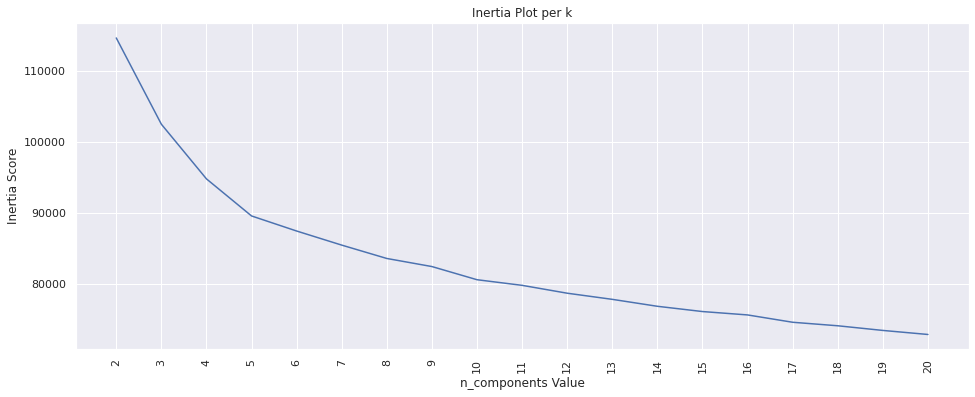

In [ ]:
# Re - Running Kmeans on "new" data

X_train = new_raw_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

Explained variance ratio (first two components): [0.188638 0.097040]


<Figure size 576x432 with 0 Axes>

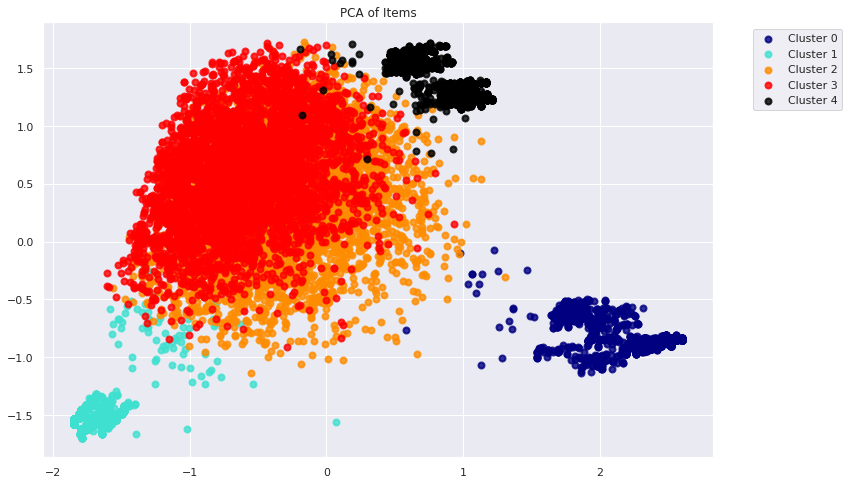

In [ ]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  9.179218140967434
The 95% variance we want to have is:  8.720257233919062

Variance explain with 30 n_compononets:  8.000932986063328
Variance explain with 35 n_compononets:  8.37888861905457
Variance explain with 36 n_compononets:  8.44237987737295
Variance explain with 40 n_compononets:  8.67414971952236
Variance explain with 41 n_compononets:  8.724324635394218
Variance explain with 50 n_compononets:  9.097200748927715


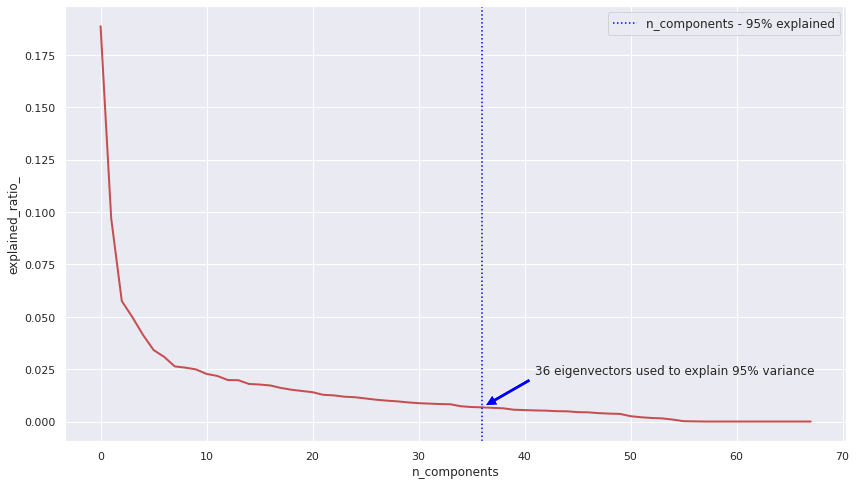

In [ ]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(36,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('36 eigenvectors used to explain 95% variance', xy=(36, pca.explained_variance_ratio_[36]), xytext=(41, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 104299.44112215482
The innertia for : 3 Clusters is: 91606.8709720256
The innertia for : 4 Clusters is: 83945.70657019329
The innertia for : 5 Clusters is: 78755.35928006942
The innertia for : 6 Clusters is: 76645.20259070433
The innertia for : 7 Clusters is: 74780.3789298093
The innertia for : 8 Clusters is: 72884.95553289355
The innertia for : 9 Clusters is: 71579.84666865927
The innertia for : 10 Clusters is: 69994.51754941468
The innertia for : 11 Clusters is: 69032.75147528521
The innertia for : 12 Clusters is: 68088.62028228026
The innertia for : 13 Clusters is: 67198.91152895683
The innertia for : 14 Clusters is: 66094.1261127083
The innertia for : 15 Clusters is: 65379.25560678313
The innertia for : 16 Clusters is: 64652.217838233766
The innertia for : 17 Clusters is: 64223.74481928666
The innertia for : 18 Clusters is: 63496.3462273476
The innertia for : 19 Clusters is: 62941.67228565634
The innertia for : 20 Clusters is: 62209.33990601146


Text(0.5, 1.0, 'Inertia Plot per k')

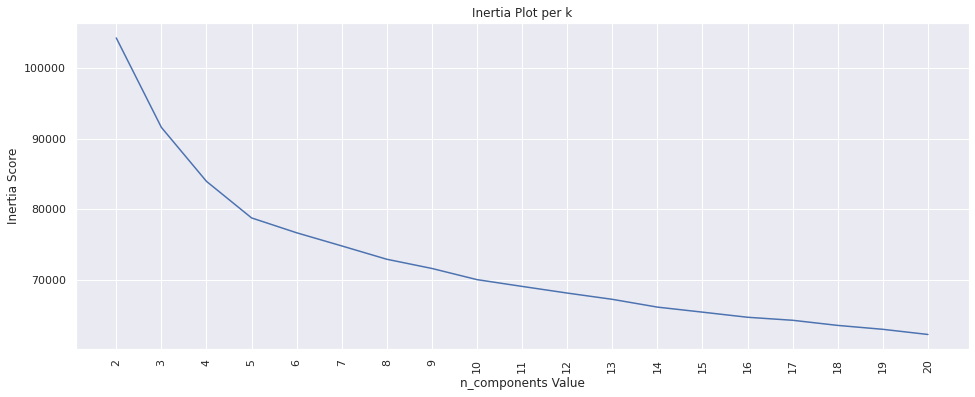

In [ ]:
# Running PCA again

pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

#9. Running Kmeans with 5 clusters and using a PCA dataset with 36 components

In [ ]:
# Running PCA with 36 PC
pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 5 Ks
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
raw_data['Clusters'] = clusters

# Creating a cluster Category
raw_data['Clusters Category'] = 'No Data'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 0] = 'Cluster 1'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 1] = 'Cluster 2'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 2] = 'Cluster 3'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 3] = 'Cluster 4'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 4] = 'Cluster 5'

raw_data.head(5)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,...,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?,Clusters,Clusters Category
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,3,Cluster 4
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,4,Cluster 5
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,4,Cluster 5
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,2,Cluster 3
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,0,Cluster 1


In [ ]:
raw_data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?', 'Clusters',
       'Clusters Category'],
      dtype='object')

In [ ]:
# Creating an order for Household Income

raw_data['Household Income Order'] = 0
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == 'Less than 20,000'] = 1
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '20,000 to 34,999'] = 2
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '35,000 to 49,999'] = 3
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '50,000 to 74,999'] = 4
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '75,000 to 99,999'] = 5
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '100,000 to 149,999'] = 6
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '150,000 to 199,999'] = 7
raw_data['Household Income Order'].loc[raw_data['Total_Household_Income'] == '200,000 or more'] = 8

# Replacing apostrophe from columns names
raw_data['Social_Media'] = raw_data['Social_Media'].str.replace("'","")

# Creating an order for Social Media Time Spend
raw_data['Social Media Time Spend Order'] = 0
raw_data['Social Media Time Spend Order'].loc[raw_data['Social_Media'] == 'I dont spend any time at all'] = 1
raw_data['Social Media Time Spend Order'].loc[raw_data['Social_Media'] == 'Up to 1 hour'] = 2
raw_data['Social Media Time Spend Order'].loc[raw_data['Social_Media'] == 'Up to 2 hours'] = 3
raw_data['Social Media Time Spend Order'].loc[raw_data['Social_Media'] == 'Half a day'] = 4
raw_data['Social Media Time Spend Order'].loc[raw_data['Social_Media'] == 'More than half a day'] = 5

# Creating an order for food_areas_coffee_areas_bars_toilets that have Entirely Agree, etc..
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'] = 0
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely agree'] = 1
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly agree'] = 2
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat agree'] = 3
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Neither agree nor disagree'] = 4
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat disagree'] = 5
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly disagree'] = 6
raw_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[raw_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely disagree'] = 7
# Creating an order for do_you_enjoy_adrenaline_rush_activities
raw_data['enjoy_adrenaline_rush_activities Agree Order'] = 0
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Entirely agree'] = 1
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Mostly agree'] = 2
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Somewhat agree'] = 3
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Neither agree nor disagree'] = 4
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Somewhat disagree'] = 5
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Mostly disagree'] = 6
raw_data['enjoy_adrenaline_rush_activities Agree Order'].loc[raw_data['Do you enjoy adrenaline-rush activities?'] == 'Entirely disagree'] = 7

# Creating an order for were_you_satisfied_with_the_last_event_you_attended_with_us
raw_data['Satisfied Agree Order'] = 0
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Entirely agree'] = 1
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Mostly agree'] = 2
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Somewhat agree'] = 3
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Neither agree nor disagree'] = 4
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Somewhat disagree'] = 5
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Mostly disagree'] = 6
raw_data['Satisfied Agree Order'].loc[raw_data['Were you satisfied with the last event you attended with us?'] == 'Entirely disagree'] = 7

# Creating an order for did_you_find_our_events_value_for_money
raw_data['Value_for_money Agree Order'] = 0
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Entirely agree'] = 1
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Mostly agree'] = 2
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Somewhat agree'] = 3
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Neither agree nor disagree'] = 4
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Somewhat disagree'] = 5
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Mostly disagree'] = 6
raw_data['Value_for_money Agree Order'].loc[raw_data['Did you find our events value for money?'] == 'Entirely disagree'] = 7

# Creating an order for would_you_recommend_our_events_to_other_people
raw_data['Recommend Order'] = 0
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Very Likely'] = 1
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Mostly Likely'] = 2
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Somewhat Likely'] = 3
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Neither agree nor disagree'] = 4
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Somewhat Unlikely'] = 5
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Mostly Unlikely'] = 6
raw_data['Recommend Order'].loc[raw_data['Would you recommend our events to other people?'] == 'Very Unlikely'] = 7

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# Exporting the data in a CSV

raw_data.to_csv('Events_Cluster_Output.csv', sep='\t')

In [ ]:
raw_data.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,...,Did you find our events value for money?,Clusters,Clusters Category,Household Income Order,Social Media Time Spend Order,food_areas_coffee_areas_bars_toilets Agree Order,enjoy_adrenaline_rush_activities Agree Order,Satisfied Agree Order,Value_for_money Agree Order,Recommend Order
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,Somewhat disagree,3,Cluster 4,4,2,1,7,3,5,5
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,Entirely disagree,4,Cluster 5,3,2,1,5,2,7,3
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,Entirely disagree,4,Cluster 5,5,1,3,5,2,7,6
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,Somewhat disagree,2,Cluster 3,3,4,4,1,3,5,3
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,Entirely agree,0,Cluster 1,6,2,4,6,1,1,7


In [ ]:
import sqlalchemy
!pip install pypyodbc  
import pypyodbc as podbc

In [ ]:
from sqlalchemy import create_engine
import urllib


quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=LAPTOP-SBR15QA4;"
                     "Database=raw_data_sql;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))



In [ ]:
raw_data1.to_sql('Events_Cluster_Output', schema='dbo', con = engine , if_exists = 'replace')

DBAPIError: ignored

In [ ]:
import pypyodbc as odbc

driver_name = 'SQL Server Native Client 11.0'
server_name ='LAPTOP-SBR15QA4'
data_base = 'raw_data_sql'

connection_string = f"""driver={{{driver_name}}};
server = {server_name};
database={data_base};
Trusted_Connection=yes;
"""



conn = odbc.connect(connection_string)
print(conn)

OperationalError: ignored

In [ ]:
https://raw.githubusercontent.com/Pitsillides91/Python-Tutorials/master/Unsupervised%20Learning/Events_Cluster_Output.csv

In [ ]:
import pyodbc

In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv('/content/rachid.csv')

In [ ]:
data.head()

,New Account No,New Account Name,Industry,Sector,Account Segment,Account Manager Alias,Segment Manager,Industry Manager
0,303143,Communities,Libraries and Museums,Libraries and Museums,SMC Comm,BECComs,Matthew L.,Andre D.
1,1111978,DualLight,Banking,Banking,Priority Commercial,SWIDung,Stelios F.,Tina Q.
2,1414111,ReactRegister,Retailers,General Merchandise,Priority Commercial,UNDRese,Stelios F.,Garry N.
3,1515106,Iselectrics,Pharmaceuticals,Pharmaceuticals,Priority Commercial,UNDIsls,Stelios F.,Rob K.
4,1515140,tismï¿½19,Higher Education,Higher Education,SMC Education,UNDmyon,Ben Mk.,John Y.


In [ ]:
data.to_excel('Events_Cluster_output1.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
